# Tabular Data Representation

### One row per sample, where columns contain feature information about sample

### Different columns don't have the same type, but PyTorch tensors should be homogeneous(torch.float32)

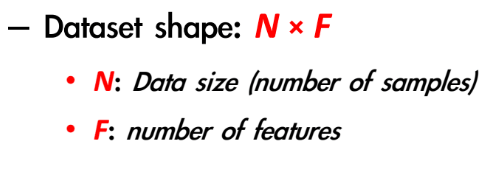

### Loading a tabular data file

In [1]:
import csv
import os
import numpy as np
import torch

In [16]:
wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
print(wineq_numpy.dtype)
print(wineq_numpy.shape)
print(wineq_numpy)

col_list = next(csv.reader(open(wine_path), delimiter=';'))
print()
print(col_list)

float32
(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### Changing into tensor and separate the target from the data

In [37]:
wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype)
print(wineq.shape)
print()

data = wineq[:, :-1]  # Selects all rows and all columns except the last
print(data.dtype)
print(data.shape)
print(data)
print()

target = wineq[:, -1]  # Selects all rows and the last column
print(target.dtype)
print(target.shape)
print(target)
print()

target = target.long()  # treat labels as an integer
print(target.dtype)
print(target.shape)
print(target)

torch.float32
torch.Size([4898, 12])

torch.float32
torch.Size([4898, 11])
tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

torch.float32
torch.Size([4898])
tensor([6., 6., 6.,  ..., 6., 7., 6.])

torch.int64
torch.Size([4898])
tensor([6, 6, 6,  ..., 6, 7, 6])


## One-hot encoding
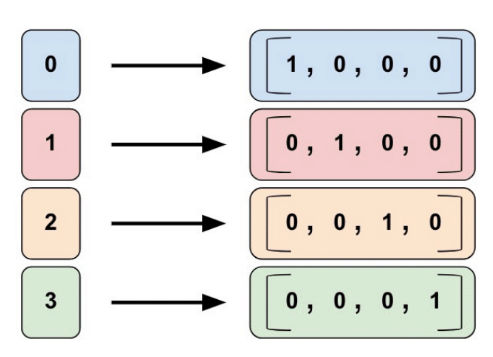

In [58]:
eye_matrix = torch.eye(10)

print(target)
print(target[0], target[1])
eye_matrix[target[1]]

tensor([6, 6, 6,  ..., 6, 7, 6])
tensor(6) tensor(6)


tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### Changing the target by one-hot encoding

In [7]:
eye_matrix = torch.eye(10)
# We use the 'target' tensor as indices to extract the corresponding rows from the identity matrix
# It can generate the one-hot vectors for each element in the 'target' tensor
onehot_target = eye_matrix[target]

print(onehot_target.shape)  # >>> torch.Size([4898, 10])
print(onehot_target[0])
print(onehot_target[1])
print(onehot_target[-2])
print(onehot_target)

torch.Size([4898, 10])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Normalizing the data

In [8]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data = (data - data_mean) / torch.sqrt(data_var)
print(data)

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])


### train_test_split
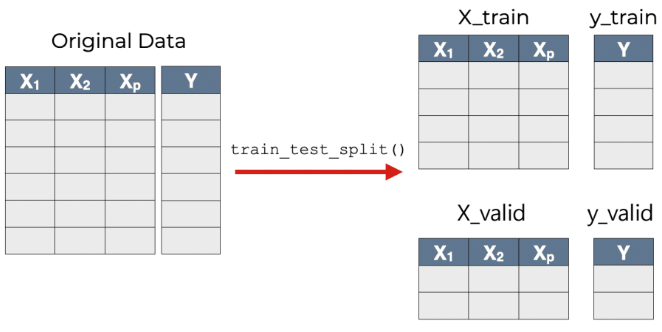

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, onehot_target, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([3918, 11])
torch.Size([3918, 10])
torch.Size([980, 11])
torch.Size([980, 10])


In [10]:
def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

  wineq = torch.from_numpy(wineq_numpy)

  data = wineq[:, :-1]  # Selects all rows and all columns except the last
  target = wineq[:, -1].long()  # treat labels as an integer

  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var)

  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid